Finding faces, with processed data

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


You'll need the processed data from the website.  Use your web browser to download http://nipy.bic.berkeley.edu/practical_neuroimaging/srabold.nii.gz into this current directory, or do:

`curl -O http://nipy.bic.berkeley.edu/practical_neuroimaging/srabold.nii.gz`

in the terminal / shell (for OSX and Linux)

In [2]:
import nibabel as nib
print "nibabel:", nib.__version__
import nipy
print "nipy:", nipy.__version__

nibabel: 2.0.0
nipy: 0.3.0


In [3]:
img = nib.load('srabold.nii.gz')

In [4]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [  4  40  64  64 121   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.    3.5   3.75  3.75  1.    1.    1.    1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 68.25
qoffset_y       : -118.125
qoffset_z       : -118.125
srow_x          : [ -3.5    0.   

Defaults for plotting

In [5]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

Loading the image may take a little while:

In [6]:
data = img.get_data()
data.shape

(40, 64, 64, 121)

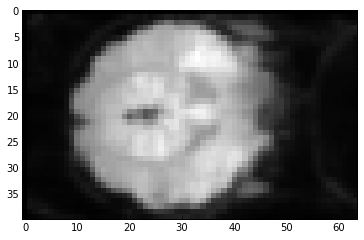

In [7]:
plt.imshow(data.mean(axis=-1)[:, :, 30])

Why is this image blurry?

So what was the subject doing here?

https://openfmri.org/dataset/ds000105

* 001 House
* 002 Scrambled
* 003 Cat
* 004 Shoe
* 005 Bottle
* 006 Scissors
* 007 Chair
* 008 Face

In [8]:
event_types = ['house', 'scrambled', 'cat', 'shoe', 'bottle', 'scissors', 'chair', 'face']

You should have the task lists for this subject in your `~/data/ds105` directory.  Let's check:

In [9]:
import os
from os import path as osp
HOME = os.path.expanduser('~')
DATA_PATH = os.path.join(HOME, 'data', 'ds105')
SUB1_TASK_PATH = os.path.join(DATA_PATH, 'sub001', 'model', 'model001', 'onsets', 'task001_run001')
os.path.isdir(SUB1_TASK_PATH)

True

If you got "False" above - you can download the zip file of the task files you need from:

http://nipy.bic.berkeley.edu/practical_neuroimaging/ds105_sub001_tasks.zip

Download the file, then `cd ~/data` and `unzip ~/Downloads/ds105_sub001_tasks.zip` (if you downloaded the file to your `Downloads` folder.

Recheck:

In [10]:
os.path.isdir(SUB1_TASK_PATH)

True

Look in this path:

In [11]:
os.listdir(SUB1_TASK_PATH)

['cond001.txt',
 'cond008.txt',
 'cond005.txt',
 'cond006.txt',
 'cond007.txt',
 'cond003.txt',
 'cond004.txt',
 'cond002.txt']

What are in these files?

In [12]:
COND1_FNAME = os.path.join(SUB1_TASK_PATH, 'cond001.txt')
print(open(COND1_FNAME, 'rt').read())

156.000	0.5	1
158.000	0.5	1
160.000	0.5	1
162.000	0.5	1
164.000	0.5	1
166.000	0.5	1
168.000	0.5	1
170.000	0.5	1
172.000	0.5	1
174.000	0.5	1
176.000	0.5	1
178.000	0.5	1



This is a common format for specifying events - any guesses what the columns are?


We can actually do :

In [13]:
dtype_def = [('onset', 'f'), ('duration', 'f'), ('amplitude', 'f')]
evs = np.loadtxt(COND1_FNAME, dtype_def)
evs

array([(156.0, 0.5, 1.0), (158.0, 0.5, 1.0), (160.0, 0.5, 1.0),
       (162.0, 0.5, 1.0), (164.0, 0.5, 1.0), (166.0, 0.5, 1.0),
       (168.0, 0.5, 1.0), (170.0, 0.5, 1.0), (172.0, 0.5, 1.0),
       (174.0, 0.5, 1.0), (176.0, 0.5, 1.0), (178.0, 0.5, 1.0)], 
      dtype=[('onset', '<f4'), ('duration', '<f4'), ('amplitude', '<f4')])

This is nice because:

In [14]:
evs[0]['onset']

156.0

In [15]:
evs['onset']

array([ 156.,  158.,  160.,  162.,  164.,  166.,  168.,  170.,  172.,
        174.,  176.,  178.], dtype=float32)

We can load our events for all types:

In [16]:
# create event_defs : a dictionary with keys the type of events, ('bottle', 'cat', ..)
event_defs = {}
for eno in range(8):
    fname = os.path.join(os.path.join(SUB1_TASK_PATH, 'cond%03d.txt' % (eno + 1)))
    print(fname)
    event_name = event_types[eno]
    event_defs[event_name] = np.loadtxt(fname, dtype_def)
event_defs          

/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond001.txt
/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond002.txt
/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond003.txt
/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond004.txt
/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond005.txt
/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond006.txt
/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond007.txt
/home/jb/data/ds105/sub001/model/model001/onsets/task001_run001/cond008.txt


{'bottle': array([(228.0, 0.5, 1.0), (230.0, 0.5, 1.0), (232.0, 0.5, 1.0),
        (234.0, 0.5, 1.0), (236.0, 0.5, 1.0), (238.0, 0.5, 1.0),
        (240.0, 0.5, 1.0), (242.0, 0.5, 1.0), (244.0, 0.5, 1.0),
        (246.0, 0.5, 1.0), (248.0, 0.5, 1.0), (250.0, 0.5, 1.0)], 
       dtype=[('onset', '<f4'), ('duration', '<f4'), ('amplitude', '<f4')]),
 'cat': array([(84.0, 0.5, 1.0), (86.0, 0.5, 1.0), (88.0, 0.5, 1.0),
        (90.0, 0.5, 1.0), (92.0, 0.5, 1.0), (94.0, 0.5, 1.0),
        (96.0, 0.5, 1.0), (98.0, 0.5, 1.0), (100.0, 0.5, 1.0),
        (102.0, 0.5, 1.0), (104.0, 0.5, 1.0), (106.0, 0.5, 1.0)], 
       dtype=[('onset', '<f4'), ('duration', '<f4'), ('amplitude', '<f4')]),
 'chair': array([(264.0, 0.5, 1.0), (266.0, 0.5, 1.0), (268.0, 0.5, 1.0),
        (270.0, 0.5, 1.0), (272.0, 0.5, 1.0), (274.0, 0.5, 1.0),
        (276.0, 0.5, 1.0), (278.0, 0.5, 1.0), (280.0, 0.5, 1.0),
        (282.0, 0.5, 1.0), (284.0, 0.5, 1.0), (286.0, 0.5, 1.0)], 
       dtype=[('onset', '<f4'), ('duration

Are these onsets in TRs or in seconds?

OK - how to make our design?

In [34]:
# use to be : import nipy.modalities.fmri.design as fmrid #
from nipy.modalities.fmri.experimental_paradigm import EventRelatedParadigm
import nipy.modalities.fmri.design_matrix as dm

#from glob import glob

EventRelatedParadigm takes a list of string and events

In [23]:
n_scans = img.shape[-1]
TR = 2.5
t = np.arange(n_trs) * TR

In [24]:
print(event_defs.keys())
print(event_defs['house']['onset'])

['house', 'cat', 'scrambled', 'shoe', 'bottle', 'scissors', 'chair', 'face']
[ 156.  158.  160.  162.  164.  166.  168.  170.  172.  174.  176.  178.]


In [25]:
conditions = []
onsets = []

for cond in event_defs.keys():
    cond_onsets = event_defs[cond]['onset']
    conditions += [cond]*len(cond_onsets)
    onsets += list(cond_onsets)

print(conditions)
print(onsets)

['house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'house', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'scrambled', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'shoe', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'bottle', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'chair', 'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face']
[156.0, 158.0, 160.0, 162.0, 164.0, 166.0, 168.0, 170.0, 172.0, 174.0, 176.0, 178.0, 84

In [32]:
# make paradigm with conditions and onsets (you could add durations and magnitude here)
paradigm = EventRelatedParadigm(conditions, onsets)

hrf_model = 'canonical'
drift_model = 'cosine'
# here you would pick the motion regressors
motion_reg = np.cumsum(np.random.randn(n_scans, 6), 0)
motion_reg_names = ['tx', 'ty', 'tz', 'rx', 'ry', 'rz']
frametimes = np.linspace(0, (n_scans - 1) * TR, n_scans)

Nice - so let's make the design:

In [35]:
X, names = dm.dmtx_light(frametimes, paradigm, drift_model='cosine',
                         hfcut=128, hrf_model=hrf_model, add_regs=motion_reg,
                         add_reg_names=motion_reg_names)


/home/jb/.virtualenvs/py2/local/lib/python2.7/site-packages/nipy/modalities/fmri/design_matrix.py:186: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if rmatrix == None:


/home/jb/.virtualenvs/py2/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


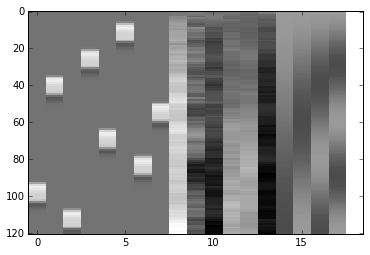

In [42]:
plt.imshow(X/X.std(axis=0), interpolation='nearest', aspect='auto')

In [48]:
from nipy.modalities.fmri.glm import GeneralLinearModel


sh = img.shape[:-1]
Y = img.get_data().reshape(np.prod(sh), n_scans)
glm = GeneralLinearModel(X)
glm.fit(Y.T)


In [49]:
# specify the contrast [1 -1 0 ..]
contrast = np.zeros(X.shape[1])
contrast[0] = 1
contrast[1] = - 1

In [51]:
# compute the constrast image related to it
zvals = glm.contrast(contrast).z_score()
contrast_image = nib.Nifti1Image(np.reshape(zvals, sh), img.get_affine())


In [52]:
con_img = np.reshape(contrast_image.get_data(), img.shape[:-1])
con_img.shape

(40, 64, 64)

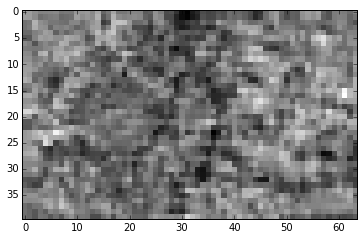

In [53]:
plt.imshow(con_img[..., 30])

Can you find any face activity you believe?